#Student Name: Gerard Kerley
#Student ID: 18195229

### Task (Complete by Saturday Week 6)
- Describe a simple problem that contains a chance element.
- Use a continuous random variable or a discrete random variable.
- Use a normal distribution or a uniform distribution.
- Write Python code to simulate an experiment with your problem.
- The simulation can include a simulated action (e.g. rolling dice) or a simulated observation (e.g. observing rain or sunshine). 

The code should run the experiment a sufficient number of times such that you can calculate/approximate the following:

- The expected value of your random variable.
- The standard deviation of your random variable.
- Plot the distribution found in your simulated experiment
 
You may only use the following modules:
- Random
- Numpy
- Matplotlib
You are not required to perform exception handling or tests.

GIT push your implementation and post the description of your problem to E-tivity 6: Probability Theory.

- Include calculated values of points 1 and 2 above.
- Provide a link to your branch.

## Experiment
Rolling 2 unbiased 6-sided dice
1. 100 times
- 1,000 times
- 10,000 times

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

def dice_roll():
    return random.randint(1,6)

def run_experiment(trials):
    sample_space = []
    for _ in range(trials):
        sample_space.append(dice_roll() + dice_roll())
    return sample_space

In [2]:
result_of_100_trials = run_experiment(100)
result_of_1K_trials = run_experiment(1000)
result_of_10K_trials = run_experiment(10000)

print ("First 20 throws: {} ...".format(result_of_1K_trials[:20]))

First 20 throws: [7, 6, 7, 10, 9, 5, 3, 8, 3, 12, 8, 11, 6, 6, 9, 8, 11, 3, 7, 11] ...


## Outputs

In [3]:
print ("========= 100 TRIALS =================")
print ("Expected value (mean): {}".format(np.mean(result_of_100_trials)))
print ("Sample Standard Deviation: {}".format(np.std(result_of_100_trials)))
print ("========= 1,000 TRIALS ===============")
print ("Expected value (mean): {}".format(np.mean(result_of_1K_trials)))
print ("Sample Standard Deviation: {}".format(np.std(result_of_1K_trials)))
print ("========= 10,000 TRIALS ==============")
print ("Expected value (mean): {}".format(np.mean(result_of_10K_trials)))
print ("Sample Standard Deviation: {}".format(np.std(result_of_10K_trials)))

========= 100 TRIALS =================
Expected value (mean): 7.12
Sample Standard Deviation: 2.2058105086339577
========= 1,000 TRIALS ===============
Expected value (mean): 6.969
Sample Standard Deviation: 2.3272384922908094
========= 10,000 TRIALS ==============
Expected value (mean): 7.0569
Sample Standard Deviation: 2.3986376112285073


## Graphs

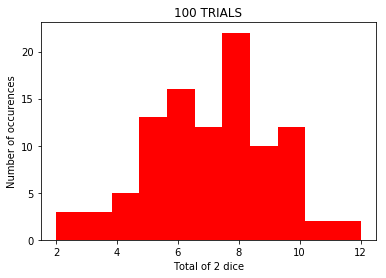

In [4]:
num_bins = 11
plt.title("100 TRIALS")
plt.xlabel('Total of 2 dice')
plt.ylabel('Number of occurences')
plt.hist(result_of_100_trials, num_bins, facecolor='red')
plt.show()

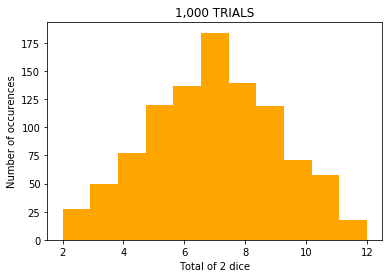

In [5]:
num_bins = 11
plt.title("1,000 TRIALS")
plt.xlabel('Total of 2 dice')
plt.ylabel('Number of occurences')
plt.hist(result_of_1K_trials, num_bins, facecolor='orange')
plt.show()

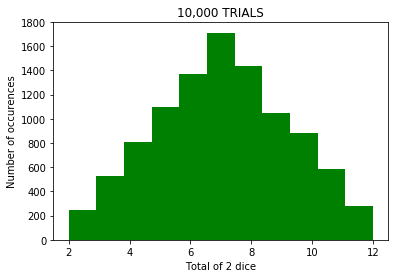

In [6]:
num_bins = 11
plt.title("10,000 TRIALS")
plt.xlabel('Total of 2 dice')
plt.ylabel('Number of occurences')
plt.hist(result_of_10K_trials, num_bins, facecolor='green')
plt.show()

### The histogram approaches a symmetrical normal distribution as the number of trials increases.